In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic = pd.read_csv("./Data/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
fare_survival = titanic.groupby("Survived").mean("Fare").reset_index()
fare_survival

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
keep_cols = ["Survived", "Fare"]
summary = fare_survival[keep_cols].dropna()
summary

,Survived,Fare
0,0,22.117887
1,1,48.395408


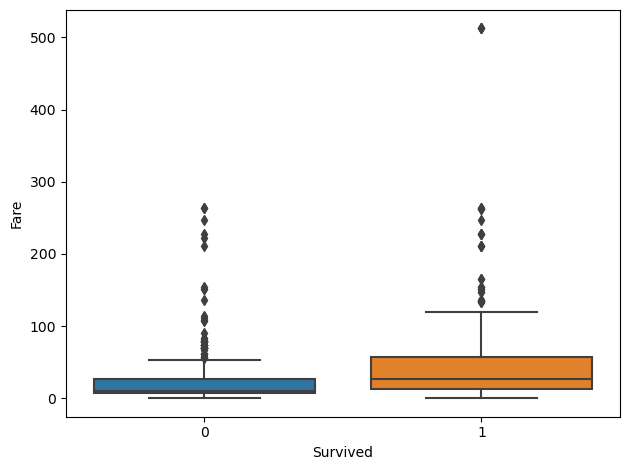

In [15]:
fig, axs = plt.subplots()
sns.boxplot(y="Fare", x="Survived", data=titanic)#, ax=axs[index])
plt.tight_layout()

In [18]:
# If we remove the one person who paid the 500 fare, does that change anything?
no_billionaires = titanic.loc[titanic["Fare"] < 500]
#no_billionaires["Fare"].max()


263.0

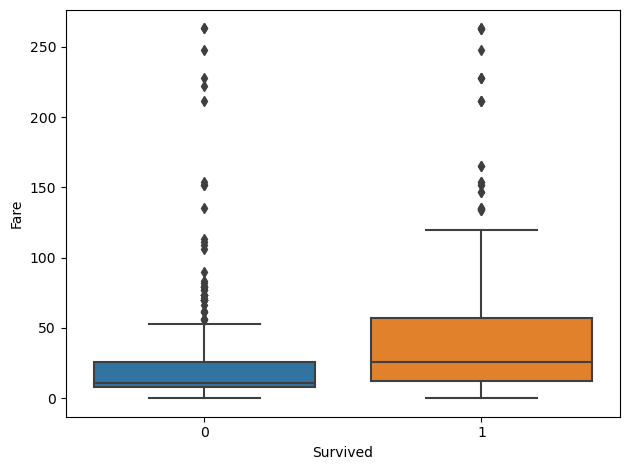

In [19]:
fig, axs = plt.subplots()
sns.boxplot(y="Fare", x="Survived", data=no_billionaires)#, ax=axs[index])
plt.tight_layout()

TypeError: Vertical orientation requires numeric `y` variable.

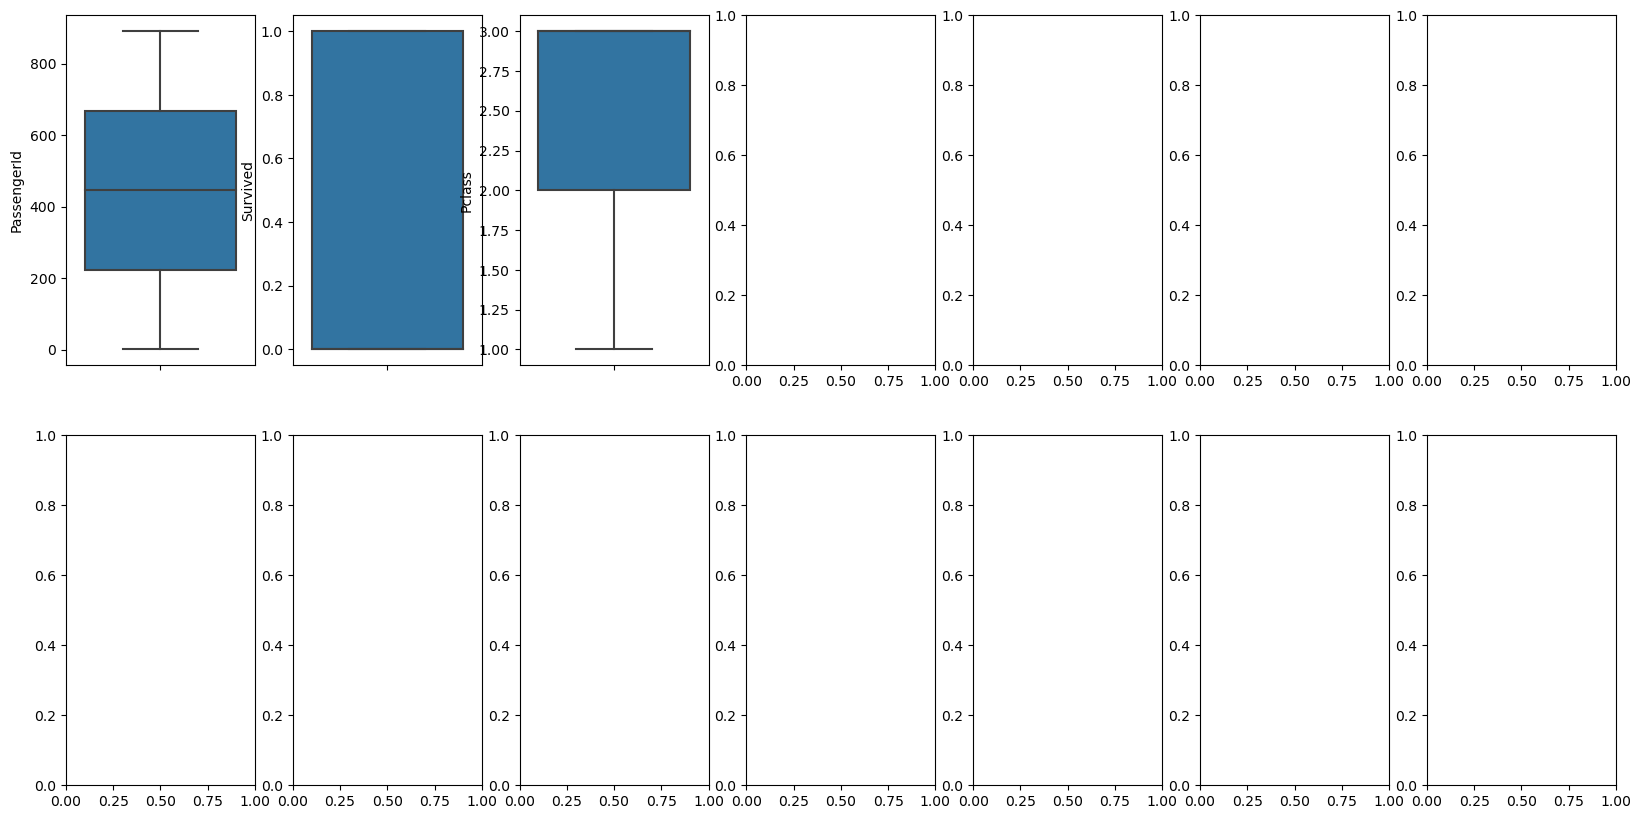

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in titanic.items():
    sns.boxplot(y=k, data=titanic, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)